<a href="https://colab.research.google.com/github/smoyarodrigo/03MAIR-Algoritmos-de-Optimizacion/blob/main/Trabajo_Pr%C3%A1ctico_Algoritmos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Algoritmos de optimización - Trabajo Práctico<br>
Nombre y Apellidos: Sergio Moya Rodrigo <br>
Url: https://colab.research.google.com/drive/1qYezMZmgQdRNalp0110NBbQUQq21OLFF?usp=sharing<br>
Google Colab: https://github.com/smoyarodrigo/03MAIR-Algoritmos-de-Optimizacion/blob/main/Trabajo_Pr%C3%A1ctico_Algoritmos.ipynb <br>
Problema:
>1. Sesiones de doblaje <br>


Descripción del problema:

SESIONES DE DOBLAJE

Se precisa coordinar el doblaje de una película. Los actores del doblaje deben coincidir en las tomas en las que sus personajes aparecen juntos en las diferentes tomas. Los actores de doblaje cobran todos la misma cantidad por cada día que deben desplazarse hasta el estudio de grabación independientemente del número de tomas que se graben. No es posible grabar más de 6 tomas por día. El objetivo es planificar las sesiones por día de manera que el gasto por os servicios de los actores de doblaje sea el menor posible. Los datos son:

Número de actores : 10

Número de tomas : 30

Actores/Tomas : https://bit.ly/36D8IuK (Datos problema doblaje 30 tomas, 10 actores)






                                        

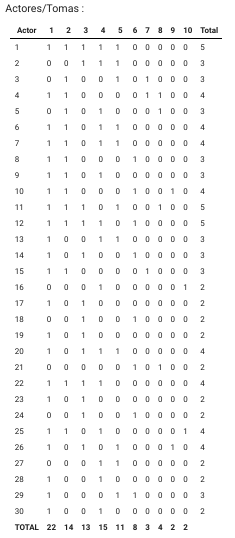

1 indica que el actor participa en la toma

0 en caso contrario

#1. Modelo
- ¿Como represento el espacio de soluciones?
- ¿Cual es la función objetivo?
- ¿Como implemento las restricciones?

#1.1. ¿Cómo represento el espacio de soluciones?

#Enfoque

  Cada solución la podemos representar asociando cada toma a un día concreto de grabación. Como tenemos 30 tomas, definimos un vector (o lista) de tamaño 30 en donde cada posición $i$ contiene el núemro de día que se graba esa toma.

#Ejemplo

  Si la solución es [1,2,2,...], significaría que:



  *   Toma 1: día 1.
  *   Toma 2: día 2.


  *   Toma 3: día 2.

  Así hasta el final de la lista.

#Restricción

  No se pueden grabar más de 6 tomas por día. Esto significa que la asignación debe cumplir que, el vector no tenga más de 6 días asignados. Es decir no se podría dar la solcución de este tipo [1,1,1,1,1,1,1,2,2,2,...] porque en el día 1 se grabarían más de 6, en este caso 7, y eso no es posible según el enunciado.







#1.2. ¿Cuál es la Función Objetivo?

Nuestro objetivo es minimizar el costo total de los actores para que vayan el menor número de días posible. Cada día se paga a los actores que participan en en las tomas programadas para ese día. El costo de un día es el número de actores que participan en al menos una toma grabada ese día.

#Frómula matemática



*   **Conjuntos**:
      - *D = días utilizados*
      - *A = conjunto de actores*      
      - *$S_d$ = conjunto de tomas asignadas al día $d$*


*   **Actores por día**

    $$A_{d} = \lbrace j \in A \mid \exists i \in S_{d} \text{ tal que } a_{ij} = 1 \rbrace$$

    Donde $a_{ij}$ = 1 indica que el actor $j$ participa en la toma $i$

*   **Costo total**

    $$\text{Costo Total} = \sum_{d \in D} |A_d|$$





#1.3. ¿Cómo implemento las restricciones?

#Restricción principal



*   La restricción principal sería el límite de tomas por día, de tal manera que ningún día puede tener más de 6 tomas asignadas. Lo representamos como:

$$\forall d \in D, \quad |S_d| \leq 6$$


*   Otras restricciones
    
    - Cada toma se asigna exactamente a un día concreto y se termina de grabar.
    - Los días se numeran de manera secuencial y ascendente 1,2,3...
    - Sólo se tienen en cuenta días con al menos una toma asignada



  Para manejar las restricciones, durante la búsqueda de soluciones descartamos o penalizamos las que incumplan la restricción de 6 tomas por día, si se encuentra al menos una que lo cumpla. Por otro lado, las solcuiones válidas deben cumplir todas las restricciones mencionadas anteriormente.


  







In [4]:
# Eejmplo de cómo se planteará y solucioanrá el problema con código en python. No es la solución final del problema que veremos en el último apartado

import random
from collections import defaultdict
# Ejemplo de matriz de participación
# La matriz "participacion" es una lista de listas, donde cada sublista corresponde a una toma.
# Por ejemplo, participacion[0] corresponde a la toma 1 y tiene 10 elementos (para 10 actores).

# Para ilustrar el ejmplo, se crea una matriz aleatoria con unos y ceros.
# Al final se usara la matriz dada en el problema.
num_tomas = 30
num_actores = 10
random.seed(42)  # Para reproducibilidad

participacion = [[random.randint(0, 1) for _ in range(num_actores)] for _ in range(num_tomas)]

def evalua_solucion(asignacion, participacion):

# Evalúa la solución calculando el costo total.
# - asignacion: lista de tamaño num_tomas, donde asignacion[i] es el día de la toma i.
# - participacion: matriz de 30 tomas x 10 actores.
# Devuelve el costo total (suma de actores presentes por día) y una penalización si se viola la restricción de máximo 6 tomas por día.

    dias = defaultdict(list)
    for i, dia in enumerate(asignacion):
        dias[dia].append(i)

    costo_total = 0
    penalizacion = 0
    for dia, tomas in dias.items():
        # Restricción: no más de 6 tomas por día
        if len(tomas) > 6:
            penalizacion += 1000 * (len(tomas) - 6)  # Penalización alta
        # Calcular el conjunto de actores involucrados en este día
        actores_dia = set()
        for t in tomas:
            for actor, participa in enumerate(participacion[t]):
                if participa == 1:
                    actores_dia.add(actor)
        costo_total += len(actores_dia)
    return costo_total + penalizacion

# Ejemplo de generación aleatoria de solución
# Asumimos arbitrariamente que inicialmente se usan 5 días
dias_iniciales = 5
solucion = [random.randint(1, dias_iniciales) for _ in range(num_tomas)]

costo = evalua_solucion(solucion, participacion)
print("Asignación inicial de tomas a días:", solucion)
print("Costo de la solución:", costo)

# Nota: Con este enfoque de código, se puede implementar una búsqueda heurística (por ejemplo, búsqueda local)
# modificando la asignación para reducir el costo, siempre respetando (o penalizando)
# la restricción de 6 tomas por día.



Asignación inicial de tomas a días: [1, 2, 5, 1, 3, 5, 5, 2, 4, 2, 1, 3, 3, 1, 3, 2, 2, 1, 3, 5, 4, 5, 2, 2, 2, 2, 4, 1, 2, 3]
Costo de la solución: 4045


#2. Análisis
- ¿Que complejidad tiene el problema?. Orden de complejidad y Contabilizar el espacio de soluciones

# 2.1. ¿Qué complejidad tienen el problema?. Orden de complejidad

El problema de las sesiones de doblaje se asemeja a problemas clásicos de particionamiento y asignación con restricciones, tales como el bin packing o scheduling con restricciones de capacidad. Dado que son problemas de naturaleza NP-hard, a medida que aumentan el número de tomas - número de días potenciales, las soluciones crecen exponencialmente, resultando computacionalmente inviable encontrar soluciones óptimas para instancias grandes.

# 2.2. Espacio de soluciones

# Representación

Cada solución la representamos como un vector de longitud n (30 tomas), donde cada elemento indica el día asignado a la toma correspondiente.

En le peor escenario, cada toma podría asignarse a cualquiera de $D$ días. Se busca minimizar días usados, con $D$ teóricamente hasta 30.

# Tamaño del espacio de soluciones

El número total de soluciones estaría dado por:

$$\text{Número de soluciones} = D^n$$

Si suponemos un caso concreto en el que n = 30 (tomas) y $D$ = 30 (días máximos teóricos) el número de soluciones sería:

$$\text{Número de soluciones} = 30^{30} \approx 2.058 \times 10^{44}$$


Confirmando así, que el espacio de soluciones crece de manera exponencial con n. Típico de porblemas NP-hard.


#3. Diseño
- ¿Que técnica utilizo? ¿Por qué?

# 3.1. Técnica utilizada y justificación

La técnica utilizada es la de **RECOCIDO SIMULADO**

Al ser un porblema NP-hard, con un crecimiento exponencial del espacio de soluciones, $D^n$, se hace imposible el uso de métodos exactos para instancias reales.

Entre las diferentes técnicas heurísticas elegimos el **RECOCIDO SIMULADO**, por ser una técnica que es relativamente fácil de implemntar.

Otras soluciones heurísticas ofrecen también ventajas de implementación como búsqueda local, pero en contra, hay atrapamiento en óptimos locales. En **RECOCIDO SIMLUADO** escapa de óptimos locales con probabilidad controlada, aunque también depende de un esquema de enfriamiento adecuado.

# Resumen del por qué de la utillización de RECOCIDO SIMULADO



*   Acepta soluciones peores temporalmente para evitar óptimos locales. Balance exploración-explotación.
*   Es ideal para porblemas de asignación con restricciones. Eficiencia en espacios grandes.

*   Comparado con métodos poblacionales como algoritmos genéticos, tiene un bajo costo computacional.







#3.2. Diseño para el problema (RECOCIDO SIMULADO)

Nuestro objetivo es minimizar el costo total de actores y penalizar violaciones de restricciones. Teniendo en cuenta que tenemos una lista de 30 elementos donde cada posición $i$ indica el día asignado a la toma $i$.

# Función Objetivo

$$\text{Costo Total} = \left( \sum_{d \in D} |A_d| \right) + \alpha \cdot \left( \sum_{d \in D} \max(0, |S_d| - 6) \right)$$



Donde:


$\left( \sum_{d \in D} |A_d| \right)$

represetan el costo diario por actores (se minimiza).


y:



$\alpha \cdot \left( \sum_{d \in D} \max(0, |S_d| - 6) \right)$


 representa la penalización por asignar más de 6 tomas/día ($\alpha$ peso de la penalización).

# Generación de vecinos



*   Selección de una toma aleatoria $i$.
*   Cambiar su día asignado a un valor aleatorio en $[1,$$D$$ + 1]$ (esto permite añadir días nuevos).

    - Ejemplo: si la solución es $[1,2,1,3,...]$, un vecino podría ser $[1,2,2,3,...]$



# Criterio de aceptación

  

* Si $\Delta E = E_{\text{vecino}} - E_{\text{actual}} < 0$: Aceptar siempre

*   Si $\Delta E \geq 0$: Aceptar con probabilidad $P = e^{-\frac{\Delta E}{T}}$ siendo $T$ la temperatura actual.

El objetivo por tanto es explorar zonas prometedoras al inicio ($T$ alta) y explotar soluciones al final ($T$ baja).

# Ventajas del diseño



*   Flexibilidad. Penalización $ \alpha $ ajsutable para priorizar restricciones.
*   Eficiencia. Movimientos locales simples reduciendo el costo computacional por iteración.










In [7]:
# Solución final y completa del problema

import random
import math
from collections import defaultdict

# Matriz de participación (30 tomas x 10 actores)
# Cada fila representa una toma y cada columna un actor (1 = participa, 0 = no participa)
participacion = [
    [1, 1, 1, 1, 1, 0, 0, 0, 0, 0],  # Toma 1
    [0, 0, 1, 1, 1, 0, 0, 0, 0, 0],  # Toma 2
    [0, 1, 0, 0, 1, 0, 1, 0, 0, 0],  # Toma 3
    [1, 1, 0, 0, 0, 0, 1, 1, 0, 0],  # Toma 4
    [0, 1, 0, 1, 0, 0, 0, 1, 0, 0],  # Toma 5
    [1, 1, 0, 1, 1, 0, 0, 0, 0, 0],  # Toma 6
    [1, 1, 0, 1, 1, 0, 0, 0, 0, 0],  # Toma 7
    [1, 1, 0, 0, 0, 1, 0, 0, 0, 0],  # Toma 8
    [1, 1, 0, 1, 0, 0, 0, 0, 0, 0],  # Toma 9
    [1, 1, 0, 0, 0, 1, 0, 0, 1, 0],  # Toma 10
    [1, 1, 1, 0, 1, 0, 0, 1, 0, 0],  # Toma 11
    [1, 1, 1, 1, 0, 1, 0, 0, 0, 0],  # Toma 12
    [1, 0, 0, 1, 1, 0, 0, 0, 0, 0],  # Toma 13
    [1, 0, 1, 0, 0, 1, 0, 0, 0, 0],  # Toma 14
    [1, 1, 0, 0, 0, 0, 1, 0, 0, 0],  # Toma 15
    [0, 0, 0, 1, 0, 0, 0, 0, 0, 1],  # Toma 16
    [1, 0, 1, 0, 0, 0, 0, 0, 0, 0],  # Toma 17
    [0, 0, 1, 0, 0, 1, 0, 0, 0, 0],  # Toma 18
    [1, 0, 1, 0, 0, 0, 0, 0, 0, 0],  # Toma 19
    [1, 0, 1, 1, 1, 0, 0, 0, 0, 0],  # Toma 20
    [0, 0, 0, 0, 0, 1, 0, 1, 0, 0],  # Toma 21
    [1, 1, 1, 1, 0, 0, 0, 0, 0, 0],  # Toma 22
    [1, 0, 1, 0, 0, 0, 0, 0, 0, 0],  # Toma 23
    [0, 0, 1, 0, 0, 1, 0, 0, 0, 0],  # Toma 24
    [1, 1, 0, 1, 0, 0, 0, 0, 0, 1],  # Toma 25
    [1, 0, 1, 0, 1, 0, 0, 0, 1, 0],  # Toma 26
    [0, 0, 0, 1, 1, 0, 0, 0, 0, 0],  # Toma 27
    [1, 0, 0, 1, 0, 0, 0, 0, 0, 0],  # Toma 28
    [1, 0, 0, 0, 1, 1, 0, 0, 0, 0],  # Toma 29
    [1, 0, 0, 1, 0, 0, 0, 0, 0, 0]   # Toma 30
]

num_tomas = len(participacion)
num_actores = len(participacion[0])

def evalua_solucion(asignacion, participacion):

   # Evalúa la solución calculando el costo total.
    # Para cada día:
    # - Se suma el número de actores que participan en al menos una toma grabada ese día.
    # - Se penaliza fuertemente si se graban más de 6 tomas en el mismo día.

    dias = defaultdict(list)
    for i, dia in enumerate(asignacion):
        dias[dia].append(i)

    costo_total = 0
    penalizacion = 0
    for dia, tomas in dias.items():
        if len(tomas) > 6:
            penalizacion += 1000 * (len(tomas) - 6)
        actores_dia = set()
        for t in tomas:
            for actor, participa in enumerate(participacion[t]):
                if participa == 1:
                    actores_dia.add(actor)
        costo_total += len(actores_dia)

    return costo_total + penalizacion

def genera_vecino(solucion_actual, max_dia):

    # Genera un vecino cambiando aleatoriamente el día asignado a una toma.

    vecino = solucion_actual.copy()
    indice = random.randint(0, len(solucion_actual) - 1)
    # Se elige un nuevo día entre 1 y max_dia (max_dia es el número máximo de días usados)
    nuevo_dia = random.randint(1, max_dia)
    vecino[indice] = nuevo_dia
    return vecino

def simulated_annealing(participacion, dias_iniciales=5, T_ini=1000, T_fin=1, alpha=0.99, iter_per_temp=1000):

    # Algoritmo de recocido simulado para organizar las sesiones de doblaje.
      # Parámetros:
        # - participacion: matriz de 30 tomas x 10 actores.
        # - dias_iniciales: número máximo de días iniciales para la solución (se puede ajustar).
        # - T_ini: temperatura inicial.
        # - T_fin: temperatura final (criterio de paro).
        # - alpha: factor de enfriamiento.
        # - iter_per_temp: número de iteraciones por nivel de temperatura.
      # Devuelve:
        # - mejor_solucion: lista de asignaciones de día para cada toma.
        # - costo_mejor: costo total de la mejor solución encontrada.

    n = len(participacion)
    # Generamos solución inicial: asignamos cada toma a un día aleatorio entre 1 y dias_iniciales.
    solucion_actual = [random.randint(1, dias_iniciales) for _ in range(n)]
    mejor_solucion = solucion_actual.copy()
    costo_actual = evalua_solucion(solucion_actual, participacion)
    costo_mejor = costo_actual
    T = T_ini

    while T > T_fin:
        for _ in range(iter_per_temp):
            vecino = genera_vecino(solucion_actual, dias_iniciales)
            costo_vecino = evalua_solucion(vecino, participacion)
            delta = costo_vecino - costo_actual
            # Criterio de aceptación: siempre se acepta si mejora; de lo contrario, con probabilidad exp(-delta/T)
            if delta < 0 or random.random() < math.exp(-delta / T):
                solucion_actual = vecino
                costo_actual = costo_vecino
                if costo_actual < costo_mejor:
                    mejor_solucion = solucion_actual.copy()
                    costo_mejor = costo_actual
        T *= alpha  # Enfriamiento
    return mejor_solucion, costo_mejor

# Parámetros del recocido simulado (se pueden ajustar según experimentos)
dias_iniciales = 10    # Se permite hasta 10 días (aunque se espera reducir el número de días útiles)
T_ini = 1000
T_fin = 1
alpha = 0.99
iter_per_temp = 1000

# Ejecutamos el recocido simulado con la matriz real
mejor_solucion, costo = simulated_annealing(participacion, dias_iniciales, T_ini, T_fin, alpha, iter_per_temp)

# Imprimimos los resultados:
print("Mejor asignación de tomas a días:")
for dia in sorted(set(mejor_solucion)):
    tomas = [i+1 for i, d in enumerate(mejor_solucion) if d == dia]
    # Para cada día, mostramos las tomas asignadas y calculamos los actores involucrados
    actores = set()
    for t in tomas:
        actores.update(i for i, flag in enumerate(participacion[t-1]) if flag == 1)
    print(f"  Día {dia}: Tomas {tomas} - Actores involucrados: {sorted(list(actores))}")

print("\nCosto total (incluye penalizaciones si hay >6 tomas en algún día):", costo)

Mejor asignación de tomas a días:
  Día 2: Tomas [18, 21] - Actores involucrados: [2, 5, 7]
  Día 3: Tomas [10, 17, 23, 24, 26] - Actores involucrados: [0, 1, 2, 4, 5, 8]
  Día 6: Tomas [3, 4, 9, 11, 15, 20] - Actores involucrados: [0, 1, 2, 3, 4, 6, 7]
  Día 7: Tomas [8, 14, 16, 19, 22, 25] - Actores involucrados: [0, 1, 2, 3, 5, 9]
  Día 8: Tomas [1, 2, 12, 13, 27, 30] - Actores involucrados: [0, 1, 2, 3, 4, 5]
  Día 9: Tomas [5, 6, 7, 28, 29] - Actores involucrados: [0, 1, 3, 4, 5, 7]

Costo total (incluye penalizaciones si hay >6 tomas en algún día): 34
